Hola, Jose!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>


<div class="alert alert-block alert-info">

# Proyecto Final: Telecomunicaciones, identificar operadores ineficaces

## Introduccion:

En el siguiente proyecto se hara la busqueda a los operadores mas ineficaces para poder mejorar el rendimiento o poder hacer un procesos de training. En el momento de encontrar las fallas se podra ver las areas de opotunidad que se poseen. Ademas, evaluar las opciones que tendrian los supervisores sobre este tipo de trabajadores.

## Objetivos:

- Objetivo Principal:
  
  Obtener los datos de los trabajadores mas ineficaces.
- Objetivos Secundarios:
  1. Encontrar opciones para su mejora.
  2. Evaluar las llamadas perdidas.
  3. Evaluar las llamadas salientes.
  4. Revisar los tiempos de espera.

## Hipotesis:

H0 (Hipótesis nula):

Los operadores tienen la misma tasa de llamadas perdidas.
No hay evidencia de que alguien sea ineficaz.

H1 (Hipótesis alternativa):

Hay operadores cuya tasa de llamadas perdidas es significativamente mayor al promedio.
Esos operadores son ineficaces.

## Paso 1: Analisis exploratorio de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
df_clientes = pd.read_csv("telecom_clients.csv")
df = pd.read_csv("telecom_dataset_new.csv")

In [3]:
print(df_clientes.info())
print("")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  

In [4]:
print("Clientes:")
print(df_clientes.head())
print("")
print("Data:")
print(df.head())

Clientes:
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16

Data:
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10             

In [5]:
df['date'] = pd.to_datetime(df['date'])
df_clientes['date_start'] = pd.to_datetime(df_clientes['date_start'])

In [6]:
df.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [7]:
df_clientes.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [8]:
df_clientes.duplicated().sum()

0

In [9]:
df.duplicated().sum()

4900

In [10]:
df_clientes.duplicated(subset="user_id").sum()

0

In [11]:
df[df.duplicated(keep=False)].head(20)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
38,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
43,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
46,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473


Tengo muchos duplicados confirmados y nulos en el df. Con los nulos del df principal al estar en internal significa que muy posiblemente haya sido una llamada externa.

En cambio cuando operator_id está vacío, significa, que la llamada no llegó a ser atendida por un operador o fue una llamada perdida antes de asignarse. Tambien, se puede deber a que fue una llamada entrante que nunca fue contestada o un registro del sistema previo a la distribución. No los vamos a llenar. Mantenerlos, pero excluirlos cuando se analice eficacia por operador.

In [12]:
df["internal"] = df["internal"].fillna("external")

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df["waiting_time"] = df["total_call_duration"] - df["call_duration"]

In [15]:
df.duplicated().sum()

0

In [16]:
df.isna().sum()

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
waiting_time              0
dtype: int64

In [17]:
df_ops = df.dropna(subset=["operator_id"]).copy()
#df_ops es para ver operadores

In [18]:
df_ops["operator_id"].isna().sum()

0

In [19]:
df_ops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 1 to 49000
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41546 non-null  int64                                
 1   date                 41546 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            41546 non-null  object                               
 3   internal             41546 non-null  object                               
 4   operator_id          41546 non-null  float64                              
 5   is_missed_call       41546 non-null  bool                                 
 6   calls_count          41546 non-null  int64                                
 7   call_duration        41546 non-null  int64                                
 8   total_call_duration  41546 non-null  int64                                
 9   waitin

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias. Además lo complementas  con un análisis de registros duplicados y de valores nulos. 

</div>

## Paso 2: Deteccion de Trabajadores ineficientes

In [20]:
df_ops['missed_calls_count'] = df_ops.apply(
    lambda row: row['calls_count'] if row['is_missed_call'] else 0,
    axis=1)

In [21]:
incoming = df_ops[df_ops['direction'] == 'in']

In [22]:
metrics = incoming.groupby('operator_id').agg(
    total_in=('calls_count', 'sum'),
    missed_in=('missed_calls_count', 'sum'),
    avg_wait=('waiting_time', 'mean')
).reset_index()

In [23]:
metrics['lost_rate'] = metrics['missed_in'] / metrics['total_in']

In [24]:
outgoing = df_ops[df_ops['direction'] == 'out']

out_metrics = outgoing.groupby('operator_id').agg(
    total_out=('calls_count', 'sum')
).reset_index()

In [25]:
metrics = metrics.merge(out_metrics, on='operator_id', how='left')

In [26]:
lost_th = metrics['lost_rate'].quantile(0.75)
wait_th = metrics['avg_wait'].quantile(0.75)
out_th  = metrics['total_out'].quantile(0.25)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra iteración)</b> <a class="tocSkip"></a><br>

Muy buen trabajo con este apartado donde identificamos las llamadas entrantes y perdidas y esto lo complementamos muy bien con las llamadas perdidas por operador. Esto posteriormente lo unes para crear la identificación de los operadores ineficientes

In [27]:
metrics['ineficaz'] = (
    (metrics['lost_rate'] >= lost_th) |
    (metrics['avg_wait'] >= wait_th) |
    (metrics['total_out'] <= out_th)
)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra iteración)</b> <a class="tocSkip"></a><br>
    
Desarrollaste un excelente trabajo con la identificación de operadores ineficientes a partir de las metricas que calculaste anteriormente. Podrías explorar la opción de indice  para agregar varias variables

In [28]:
ineficaces = metrics[metrics['ineficaz'] == True]
ineficaces

,operator_id,total_in,missed_in,avg_wait,lost_rate,total_out,ineficaz
7,882478.0,3,0,38.00,0.000000,1.0,True
8,882680.0,99,3,37.00,0.030303,NaN,True
9,882684.0,613,4,190.52,0.006525,661.0,True
10,882686.0,766,6,165.75,0.007833,2884.0,True
11,882688.0,15,0,336.50,0.000000,43.0,True
...,...,...,...,...,...,...,...
745,970244.0,2,0,81.00,0.000000,2.0,True
746,970252.0,1,0,25.00,0.000000,5.0,True
747,970254.0,3,0,121.00,0.000000,9.0,True
749,971102.0,76,0,338.00,0.000000,NaN,True


Como ya tenemos a los ineficientes, vamos a buscar que todo este bien.

In [29]:
metrics[metrics['total_in'] == 0]
metrics[metrics['total_out'] == 0]

,operator_id,total_in,missed_in,avg_wait,lost_rate,total_out,ineficaz


In [30]:
ineficaces.sort_values('lost_rate', ascending=False).head(10)

,operator_id,total_in,missed_in,avg_wait,lost_rate,total_out,ineficaz
641,948756.0,1,1,8.000000,1.000000,170.0,True
185,904344.0,4,3,27.500000,0.750000,5.0,True
287,913886.0,2,1,13.500000,0.500000,NaN,True
210,906392.0,18,7,35.571429,0.388889,53.0,True
467,934098.0,6,2,31.800000,0.333333,NaN,True
497,937432.0,3,1,12.000000,0.333333,19.0,True
109,897872.0,3,1,21.666667,0.333333,49.0,True
698,957922.0,3,1,13.000000,0.333333,16.0,True
220,906412.0,26,7,26.666667,0.269231,315.0,True
265,910226.0,8,2,16.500000,0.250000,NaN,True


In [31]:
ineficaces.sort_values('avg_wait', ascending=False).head(10)

,operator_id,total_in,missed_in,avg_wait,lost_rate,total_out,ineficaz
337,919794.0,1136,1,1007.375000,0.000880,21.0,True
206,906070.0,324,2,889.800000,0.006173,71.0,True
335,919790.0,1578,0,866.803279,0.000000,23.0,True
445,931458.0,2078,12,681.961538,0.005775,2363.0,True
358,921318.0,2323,6,615.418182,0.002583,2560.0,True
207,906076.0,24,0,611.500000,0.000000,1.0,True
333,919552.0,1089,1,561.757576,0.000918,63.0,True
328,919204.0,1167,9,550.941176,0.007712,9.0,True
288,913938.0,4766,14,526.974026,0.002937,408.0,True
334,919554.0,1182,11,503.157895,0.009306,11.0,True


In [32]:
df_ops.to_csv("df_ops.csv", index=False)
metrics.to_csv("metrics_operadores.csv", index=False)

## Paso 3: Graficos para Analisis

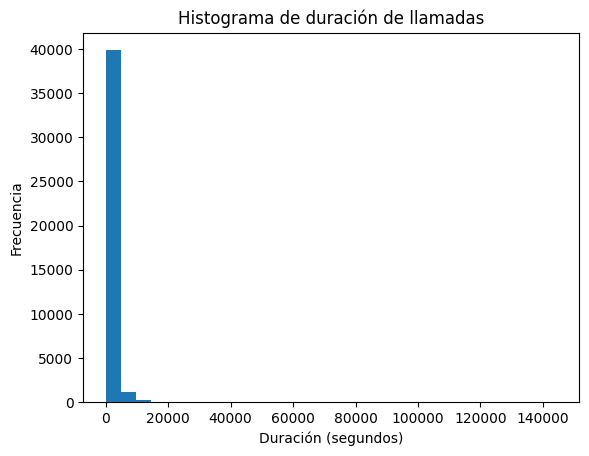

In [33]:
plt.hist(df_ops["call_duration"], bins=30)
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.title("Histograma de duración de llamadas")
plt.show()

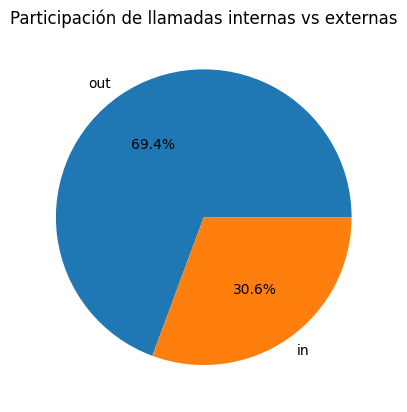

In [34]:
df_ops["direction"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Participación de llamadas internas vs externas")
plt.ylabel("")  # Quita etiqueta
plt.show()

In [35]:
df_internal = df_ops[df_ops["direction"] == "internal"]

In [36]:
df_external = df_ops[df_ops["direction"] == "external"]

In [37]:
inef = metrics[metrics["operator_id"].isin(ineficaces["operator_id"])]["lost_rate"]
norm = metrics[~metrics["operator_id"].isin(ineficaces["operator_id"])]["lost_rate"]

# prueba no paramétrica (mejor que t-test porque lost_rate no es normal)
stat, p = mannwhitneyu(inef, norm, alternative="greater")

p

6.644919575753493e-55

In [38]:
if p < 0.05:
    print("➡️ Rechazamos H0: los operadores ineficaces tienen una pedida de llamadas significativamente mayor.")
else:
    print("➡️ No podemos rechazar H0: la perdida de llamadas de los operadores ineficaces NO es significativamente mayor.")

➡️ Rechazamos H0: los operadores ineficaces tienen una pedida de llamadas significativamente mayor.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra iteración)</b> <a class="tocSkip"></a><br>
    
Gran trabajo con el desarrollo de la prueba de hipótesis para comparar a los operadores eficientes y a los ineficientes. 

## Conclusiones & Recomendaciones:

En suma, se puede determinar que tenemos 415 empleados que no estan alcanzando las metricas adecuadas de 49000. Al actualizar informacion de otras empresas se pueden ver las estrategias que estas usan. Nos podemos basar en el los estudios de eficiencia de las mismas. Los operadores con mayor rango de ineficacia tambien pieden mas llamadas en promedio. Evalúe a varias  empresas con objetivos similares para obtener sugerencias en las acciones a tomar como eficientizar los costos y agregar métricas.

Segun el SQM Group enumera muchos indicadores muy usados para medir productividad y eficiencia, como el Average Handle Time (AHT), la tasa de utilización y la ocupación del agente. Según ellos, la tasa óptima de ocupación de los agentes está entre 75 % y 85%. También hablan del “First Call Resolution” (FCR), que es muy importante para la eficiencia: cuando los agentes resuelven el problema en la primera llamada, ahorras tiempo y esfuerzo. 

**Métricas operacionales recomendadas:**

La Average Handle Time (AHT): tiempo promedio que un agente pasa en la llamada más tareas posteriores. Según CloudTalk, es un KPI crítico para medir la eficiencia del agente. 

Service Level (nivel de servicio): porcentaje de llamadas respondidas dentro de un tiempo objetivo (por ejemplo, “80 % de las llamadas en 20 segundos”). CloudTalk habla de ese estándar. 

Tasa de abandono (“abandonment rate”): llamadas que los clientes cuelgan antes de ser atendidas. Es un indicador de eficiencia de la distribución y del dimensionamiento del centro. 

Agent Occupancy Rate: mide cuánto tiempo los agentes están ocupados en tareas relacionadas con llamadas (no solo hablando, también en espera o haciendo trabajo después de la llamada). 

Schedule Adherence (adhesión al horario): qué tanto los agentes están disponibles durante sus horas programadas. Esto es clave para eficiencia operativa. 


**Investigación académica sobre el comportamiento del cliente y el tiempo de espera:**

Un estudio (“To Wait or Not to Wait: Two-way Functional Hazards Model…”) modela cómo los clientes esperan en la cola, lo que da insumos para mejorar la asignación de agentes y prever el “abandono” por espera alta. Otro trabajo (“Silent Abandonment in Contact Centers…”) analiza cómo algunos clientes abandonan sin señalizar (“silent abandonment”), y cómo esto reduce la eficiencia porque los agentes pueden quedar esperando inútilmente. 

En el white paper de 31West se describen métricas recomendadas como Service Level, First Call Resolution, Average Handling Time, Call Abandonment, y la adherencia al horario.  Estas métricas son usadas para balancear eficiencia (tiempo) con calidad del servicio (resolución, satisfacción del cliente).

**Benchmarks recientes:**

Según Balto (plataforma de call center), algunos puntos de referencia para métricas de agentes son: Average After-Call Work (ACW) ≈ 45 s; Average Abandonment Rate (tasa de llamdas abandonadas) entre 5–7 %; Service Level 80% en 20 s; Average Handling Time alrededor de 6 min y 10 s. 

En informes de benchmarking de call centers (WiFiTalents) también se reportan métricas operativas como AHT promedio (~6 min), tiempo de retención de clientes, tasa de abandono, etc. 

**Eficiencia desde los costos:**

En el blog de Enthu.AI mencionan métricas como “Cost per Call” (costo por llamada), que es útil para ver eficiencia no solo desde el tiempo, sino desde la perspectiva económica. Un centro muy eficiente no solo responderá rápido, sino que también optimizará el costo total de operación.

## Fuentes

- https://www.sqmgroup.com/resources/library/blog/top-10-call-center-productivity-metrics
- https://callcriteria.com/call-center-performance-metrics-examples/
- https://callcriteria.com/call-center-performance-metrics-examples/
- https://www.31west.net/call-center-resources/31West-White-Paper-Call-Center-Metrics.pdf
- https://www.balto.ai/blog/call-center-metrics-and-kpis-to-measure-agent-performance-2
- https://wifitalents.com/call-center-benchmark-statistics/
- https://www.cloudtalk.io/blog/call-center-metrics-analytics-and-reporting/

## Enlace

https://drive.google.com/drive/folders/1patKFozfgM-WSkjs1aB0N1d0E9ABN3L-?usp=sharing